In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Task 1: Exploring and Visualizing a Simple Dataset

In [148]:
# using pandas libaries load data
# df=pd.read_csv('iris.csv')


# using seaborn
df=sns.load_dataset('iris')

In [149]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [150]:
# check the data dimension
df.shape

(150, 5)

In [224]:
# check the dataset columns
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#### basic visualizations:

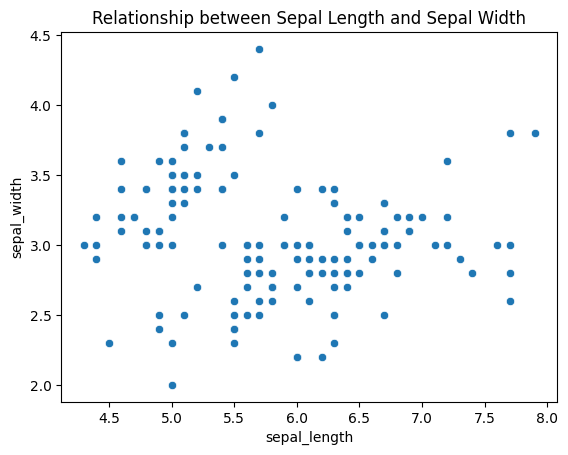

In [152]:
# Scatter plot to analyze relationships between variables.
sns.scatterplot(data=df, x='sepal_length', y='sepal_width')
plt.title('Relationship between Sepal Length and Sepal Width')
plt.show()

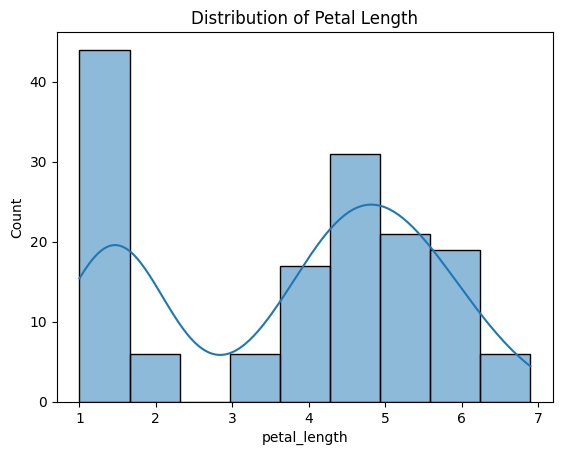

In [153]:
# Histogram to examine data distribution.
sns.histplot(data=df, x='petal_length', kde=True)
plt.title('Distribution of Petal Length')
plt.show()

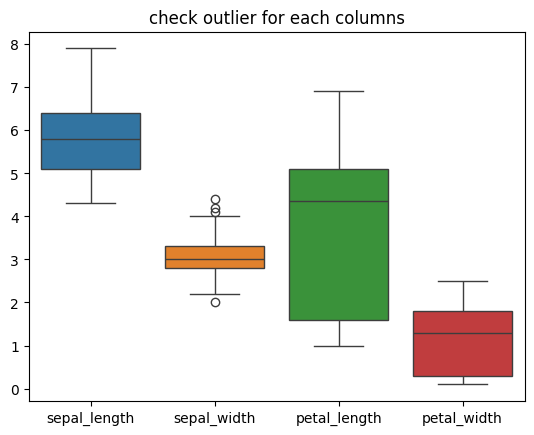

In [154]:
#boxplot on the overall data
sns.boxplot(data=df)
plt.title('check outlier for each columns')
plt.show()

### Task 2: Credit Risk Prediction

In [155]:
#load the data and first five rows display
credit_card_risk=pd.read_csv('/content/Lone_predition_data.csv')
credit_card_risk.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [156]:
# check missing values
credit_card_risk.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [157]:
# overall information for data
credit_card_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Handle missing data appropriately.

In [158]:
# handle missing value
credit_card_risk['Gender'].fillna(credit_card_risk['Gender'].mode()[0], inplace=True)
credit_card_risk['Married'].fillna(credit_card_risk['Married'].mode()[0], inplace=True)
credit_card_risk['Dependents'].fillna(credit_card_risk['Dependents'].mode()[0], inplace=True)
credit_card_risk['Self_Employed'].fillna(credit_card_risk['Self_Employed'].mode()[0], inplace=True)

credit_card_risk['LoanAmount'].fillna(credit_card_risk['LoanAmount'].mean(), inplace=True)
credit_card_risk['Loan_Amount_Term'].fillna(credit_card_risk['Loan_Amount_Term'].mean(), inplace=True)
credit_card_risk['Credit_History'].fillna(credit_card_risk['Credit_History'].mean(), inplace=True)

/tmp/ipython-input-158-1468938339.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_card_risk['Gender'].fillna(credit_card_risk['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-158-1468938339.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

Visualize key features such as loan amount, education, and income.

In [159]:
# heck unique value in eduction columns
credit_card_risk['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

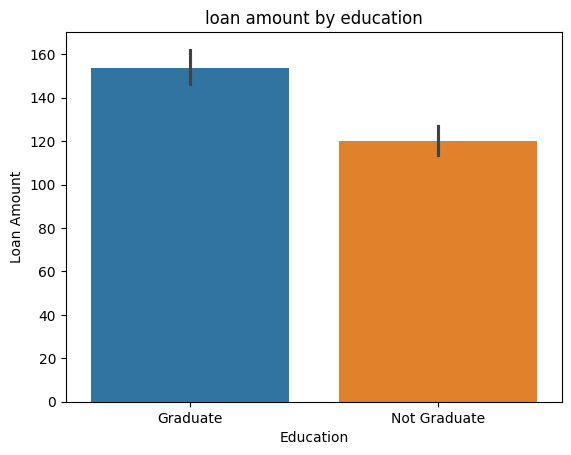

In [160]:
# visulazation education and loanamount columns
sns.barplot(x='Education',y='LoanAmount',data=credit_card_risk,hue='Education')
plt.title('loan amount by education')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

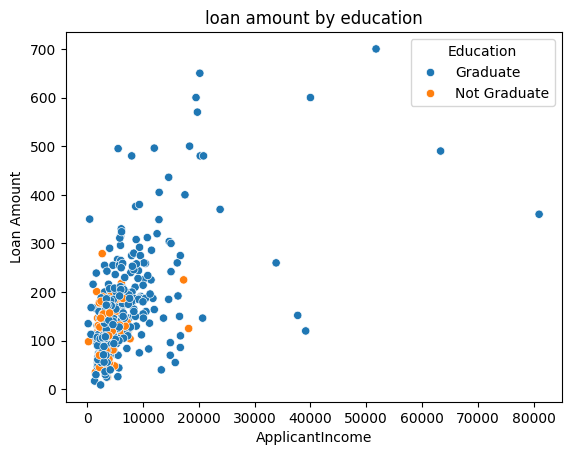

In [161]:
# make scatter plot with ApplicantIncome and loanamount columns according to eduction columns
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=credit_card_risk,hue='Education')
plt.title('loan amount by education')
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan Amount')
plt.show()

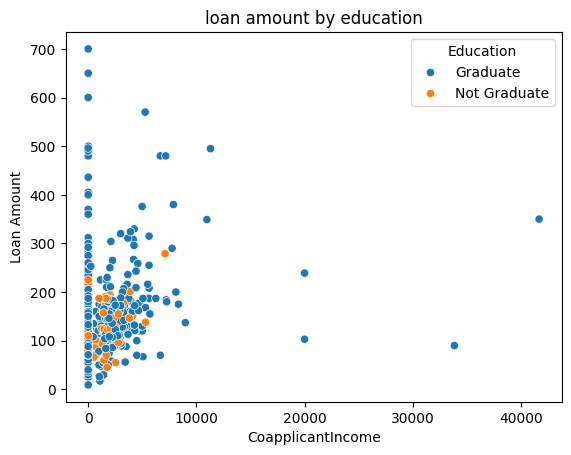

In [162]:
# make scatter plot with CoapplicantIncome and loanamount columns according to eduction columns
sns.scatterplot(x='CoapplicantIncome',y='LoanAmount',data=credit_card_risk,hue='Education')
plt.title('loan amount by education')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Loan Amount')
plt.show()

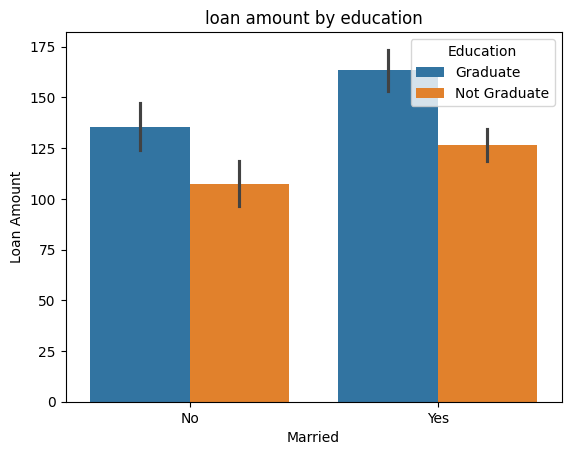

In [163]:
#bar plot
sns.barplot(x='Married',y='LoanAmount',data=credit_card_risk,hue='Education')
plt.title('loan amount by education')
plt.xlabel('Married')
plt.ylabel('Loan Amount')
plt.show()

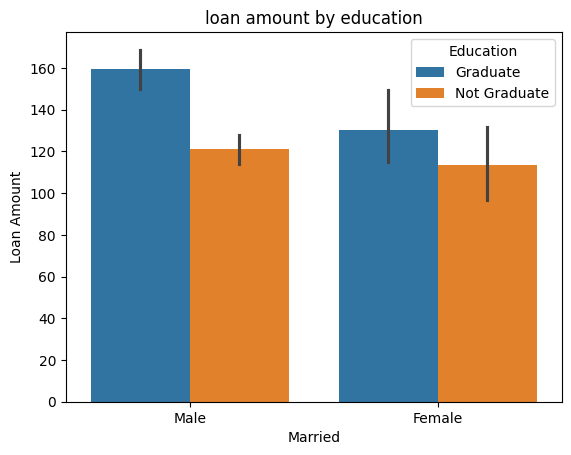

In [164]:
# barplot on loan amount by education
sns.barplot(x='Gender',y='LoanAmount',data=credit_card_risk,hue='Education')
plt.title('loan amount by education')
plt.xlabel('Married')
plt.ylabel('Loan Amount')
plt.show()

Train a classification model like Logistic Regression or Decision Tree.

In [165]:
# split the data and loanid columns drop in the dataset and loan status columns keep tartget variable
x=credit_card_risk.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=credit_card_risk['Loan_Status']

In [166]:
# import libaries
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [167]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [168]:
# encoding technique implement on target columns
le=LabelEncoder()
y_train_encoded=le.fit_transform(y_train)
y_test_encoded=le.transform(y_test)

In [169]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,Male,Yes,0,Graduate,No,6000,2250.0,265.000000,360.0,0.842199,Semiurban
90,Male,Yes,0,Graduate,No,2958,2900.0,131.000000,360.0,1.000000,Semiurban
227,Male,Yes,2,Graduate,No,6250,1695.0,210.000000,360.0,1.000000,Semiurban
482,Male,Yes,0,Graduate,No,2083,3150.0,128.000000,360.0,1.000000,Semiurban
464,Male,No,0,Graduate,No,4166,0.0,98.000000,360.0,0.000000,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
71,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.000000,360.0,1.000000,Semiurban
106,Male,Yes,2,Graduate,No,11417,1126.0,225.000000,360.0,1.000000,Urban
270,Female,No,0,Graduate,No,3237,0.0,30.000000,360.0,1.000000,Urban
435,Female,Yes,0,Graduate,No,10047,0.0,146.412162,240.0,1.000000,Semiurban


In [170]:
# categorical and numrical columns sperate make list
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
# implement columsn transaformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [171]:
# model train
model = LogisticRegression()
model.fit(X_train_processed, y_train_encoded)
y_pred_encoded = model.predict(X_test_processed)
y_pred = le.inverse_transform(y_pred_encoded)

Evaluate the model using accuracy and a confusion matrix.

In [172]:
# evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
report = classification_report(y_test_encoded, y_pred_encoded)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



# Task 3: Customer Churn Prediction (Bank Customers)

In [173]:
# load dataset
churn=pd.read_csv('/content/Churn_Modelling.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Clean and prepare the dataset.

In [174]:
# check missing values
churn.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [175]:
# some columns remove
churn = churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Encode categorical features such as geography and gender.

In [176]:
# ecoding using get_dummies pandas fucntion
churn = pd.get_dummies(churn, columns=['Geography'], drop_first=True)
churn['Gender'] = churn['Gender'].map({'Female': 0, 'Male': 1})

Train a classification model.

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
# split the data and train the model
X = churn.drop('Exited', axis=1)
y = churn['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [179]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.866
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Analyze feature importance

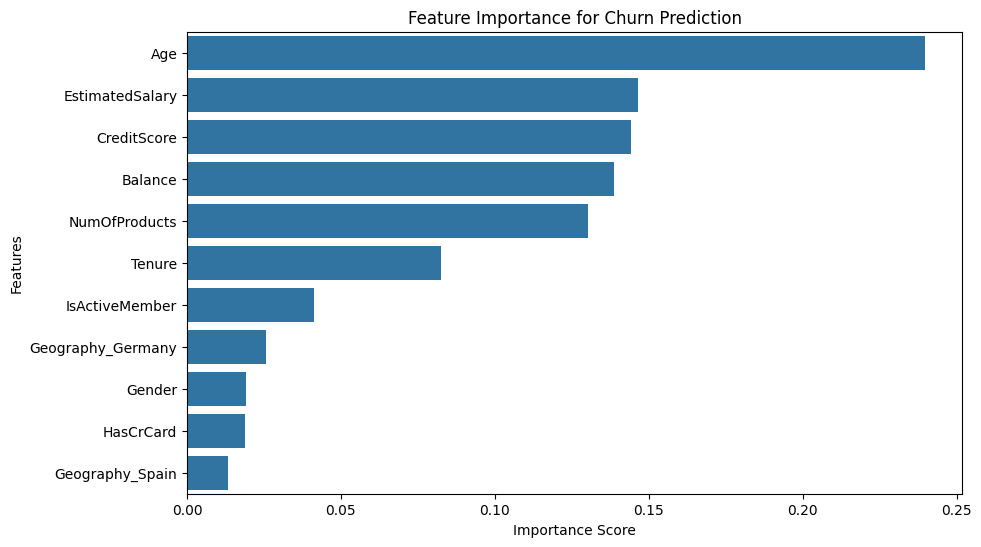

In [180]:
# check important feature
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Task 4: Predicting Insurance Claim Amounts

In [181]:
# load dataset
insurance=pd.read_csv('/content/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [182]:
#econding technique implement one the sex,smoker,region columns
insurance = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'], drop_first=True)

Train a Linear Regression model to predict charges.

In [183]:
# import model and matrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [184]:
# split the data
X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Visualize how BMI, age, and smoking status impact insurance charges.

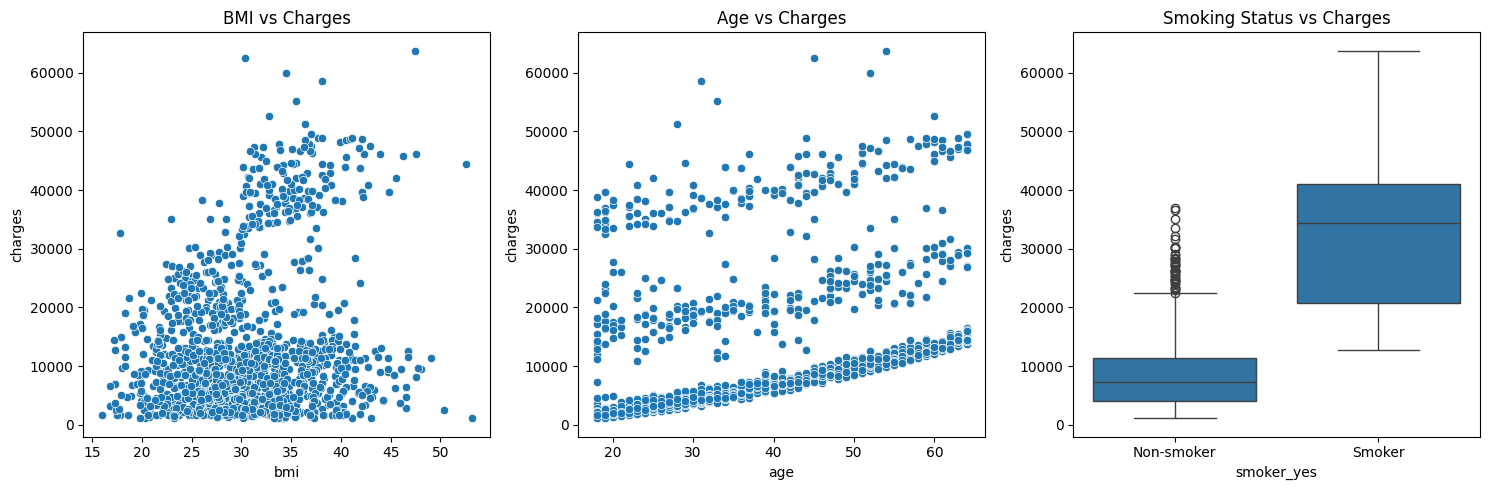

In [185]:
# some visulazation show
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='bmi', y='charges', data=insurance)
plt.title('BMI vs Charges')

plt.subplot(1, 3, 2)
sns.scatterplot(x='age', y='charges', data=insurance)
plt.title('Age vs Charges')

plt.subplot(1, 3, 3)
sns.boxplot(x='smoker_yes', y='charges', data=insurance)
plt.title('Smoking Status vs Charges')
plt.xticks([0, 1], ['Non-smoker', 'Smoker'])

plt.tight_layout()
plt.show()

Evaluate model performance using MAE and RMSE.

In [186]:
# Evaluate the model and check the performance
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 4181.19447375365
Root Mean Squared Error (RMSE): 5796.284659276273


# Task 5: Personal Loan Acceptance Prediction

In [202]:
# load the dataset
bank=pd.read_csv('/content/bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [192]:
# check columns
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

● Perform basic data exploration on features such as age, job, and marital status.

In [193]:
# check dimension
bank.shape

(45211, 17)

In [194]:
# check unique value in age columns
bank['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [195]:
# check unique value in job columns
bank['job'].value_counts()

,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


In [196]:
# check unique vlaues in marital column
bank['marital'].value_counts()

,count
marital,
married,27214
single,12790
divorced,5207


In [197]:
# 5 number summary
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Train a Logistic Regression or Decision Tree classifier.

In [198]:
from sklearn.linear_model import LogisticRegression

In [204]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [206]:
# rename target column
bank.rename(columns={'y': 'loan_acceptance'}, inplace=True)

In [209]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'loan_acceptance'],
      dtype='object')

In [212]:
# split the data
x=bank.drop(columns=['loan_acceptance'],axis=1)
y=bank['loan_acceptance']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [225]:
# check top 5 value
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3344,41,blue-collar,married,primary,no,849,yes,no,unknown,15,may,72,1,-1,0,unknown
17965,49,technician,married,primary,no,1415,yes,no,cellular,30,jul,269,2,-1,0,unknown
18299,42,admin.,married,secondary,no,3842,no,no,cellular,31,jul,130,4,-1,0,unknown
10221,37,management,single,tertiary,no,-119,yes,no,unknown,11,jun,375,11,-1,0,unknown
32192,56,blue-collar,married,primary,no,3498,no,no,cellular,15,apr,264,2,-1,0,unknown


In [217]:
# encoding technique implement on categorical columns
ohe=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
X_train_encoded=ohe.fit_transform(X_train)
X_test_encoded=ohe.transform(X_test)

In [218]:
# encoding technique implement on target column
le=LabelEncoder()
y_train_encoded=le.fit_transform(y_train)
y_test_encoded=le.transform(y_test)

In [221]:
# train the model
model=LogisticRegression()
model.fit(X_train_encoded, y_train_encoded)
y_pred= model.predict(X_test_encoded)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Analyze the results to identify which customer groups are more likely to accept the offer.

/tmp/ipython-input-226-3064928897.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


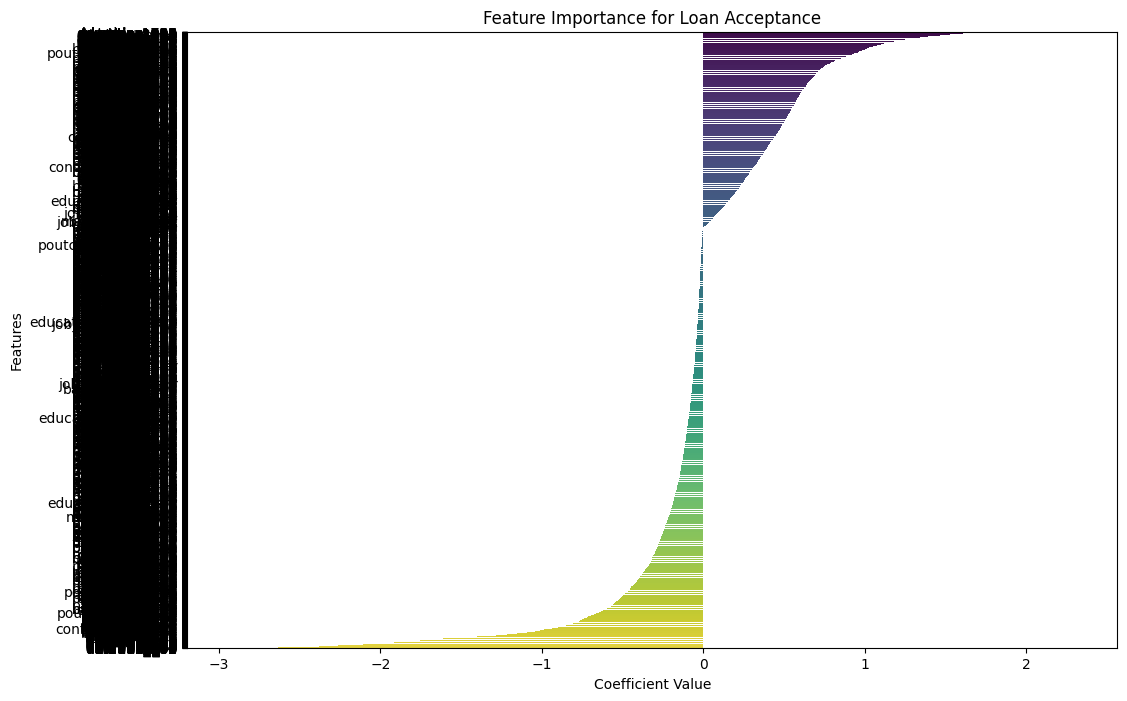

In [226]:
# Analyze the results to identify which customer groups are more likely to accept the offer.
feature_names = ohe.get_feature_names_out(x.columns)
coefficients = model.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
# make a plot
plt.figure(figsize=(12, 8))  # Increased figure size
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Feature Importance for Loan Acceptance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()